In [97]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import HarvardLab
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [98]:
h5=h5py.File("../data/184-light.h5","r+")
hlab=HarvardLab.HarvardLab(dataset=h5,settings={"calcium_intensity_kernel_xy":1,"calcium_intensity_kernel_z":1})
hlab.update_all_ci()
#hlab.save_ci_int()

Calculating CI intensities.
3002/3002
Done.


In [99]:
ci_int_gt=hlab.ci_int.copy()
ci_int_gt.shape

(84, 3002, 2)

In [100]:
hlab.update_pointdat(h5["NN_pointdat"])
hlab.update_all_ci()

Calculating CI intensities.
3002/3002
Done.


In [101]:
ci_int_nn=hlab.ci_int.copy()
ci_int_nn.shape

(84, 3002, 2)

In [109]:
gt_flat=ci_int_gt[:,:,0].flatten()
nn_flat=ci_int_nn[:,:,0].flatten()
Ntot=len(gt_flat)
nn_exist=np.logical_not(np.isnan(nn_flat))
gt_exist=np.logical_not(np.isnan(gt_flat))
valids=gt_exist*nn_exist
print("valid fraction:",np.sum(valids)/Ntot)
nn_rec=np.sum(valids)/np.sum(gt_exist)
print("nn recovery",nn_rec)
gt_flat=gt_flat[valids]
nn_flat=nn_flat[valids]
trim_at=1.5
trimmed=(gt_flat<trim_at)*(nn_flat<trim_at)
print("trimmed fraction:",np.sum(trimmed)/Ntot)
gt_flattr=gt_flat[trimmed]
nn_flattr=nn_flat[trimmed]
print("remaining",len(gt_flat))

valid fraction: 0.8070651311823863
nn recovery 0.9746374729421681
trimmed fraction: 0.7989871831477428
remaining 203516


In [110]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "linear", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0
    z=np.log(z+1)

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Log [Density+1]')

    return ax

Text(0.5, 1.0, 'NN recovery rate: 97.5 %')

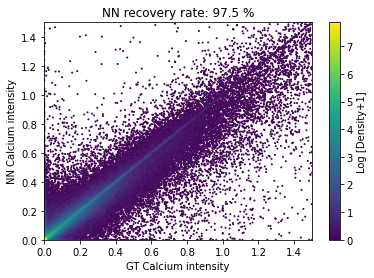

In [111]:
#fig=plt.figure(figsize=(6,5))
#ax=fig.add_subplot(111)
ax=density_scatter(gt_flattr,nn_flattr,bins=200,s=1)
ax.set_ylim(0,trim_at)
ax.set_xlim(0,trim_at)
ax.set_ylabel("NN Calcium intensity")
ax.set_xlabel("GT Calcium intensity")
ax.set_title("NN recovery rate: "+str(np.round(nn_rec*100,1))+" %")

In [112]:
nz=(gt_flat!=0)|(nn_flat!=0)
gt_flat_nz=gt_flat[nz]
nn_flat_nz=nn_flat[nz]
errors=(nn_flat_nz-gt_flat_nz)/np.maximum(gt_flat_nz,nn_flat_nz)

In [114]:
nz=(gt_flat!=0)
gt_flat_nz=gt_flat[nz]
nn_flat_nz=nn_flat[nz]
errors=(nn_flat_nz-gt_flat_nz)/gt_flat_nz

Text(0, 0.5, 'Counts')

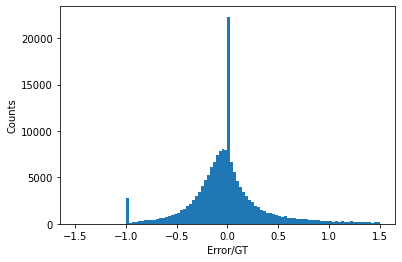

In [115]:
_=plt.hist(errors,bins=np.linspace(-1.5,1.5,103))
plt.xlabel("Error/GT")
plt.ylabel("Counts")

In [20]:
res

In [13]:
t=np.random.randint(0,h5.attrs["T"])
i=np.random.randint(1,h5.attrs["N_neurons"]+1)
print(h5["pointdat"][t][i].astype(np.int32),end=" ")
print(ci_int_gt[i-1][t])
print(h5["NN_pointdat"][t][i].astype(np.int32),end=" ")
print(ci_int_NN[i-1][t])

[126  98   8] [0. 0.]
[126  98   7] [0.         0.00328767]


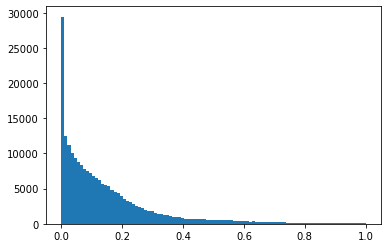

In [34]:
_=plt.hist(ci_int_gt[:,:,0].flatten(),bins=np.linspace(0,1,100))

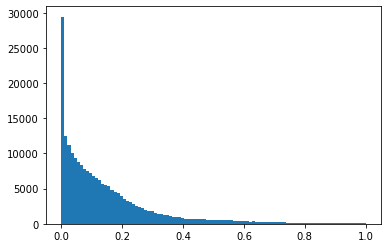

In [35]:
_=plt.hist(ci_int_NN[:,:,0].flatten(),bins=np.linspace(0,1,100))